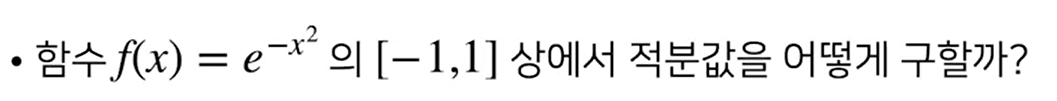
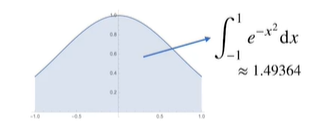

### 몬테카를로 적분은 무작위의 샘플을 이용하여 적분 값을 추정하는 방법이며 아래와 같은 절차로 수행.

1. 적분 구간 내에서 무작위로 샘플을 선택합니다.

2. 선택된 샘플에서 함수 값을 계산합니다.

3. 함수 값의 평균을 구하고, 이를 적분 구간의 길이와 곱하여 적분 값을 추정합니다.

In [4]:
import numpy as np

# 몬테카를로 적분 함수 정의
# fun: 적분하려는 함수
# low: 적분 구간의 하한값
# high: 적분 구간의 상한값
# sample_size: 샘플의 크기 (기본값은 100)
# repeat: 반복 횟수 (기본값은 10)


def mc_int(fun, low, high, sample_size=100, repeat=10):
    # 적분 구간의 길이를 계산
    int_len = np.abs(high - low)
    
    # 적분 값들을 저장할 리스트 초기화
    stat = []
    
    # 적분을 repeat 횟수만큼 반복
    for _ in range(repeat):
        # low와 high 사이에서 sample_size개의 난수 샘플 생성
        x = np.random.uniform(low=low, high=high, size=sample_size)
        
        # 생성한 샘플을 fun 함수에 적용
        fun_x = fun(x)
        
        # fun_x 값들의 평균을 구하고, 적분 구간의 길이를 곱하여 적분 값을 계산
        int_val = int_len * np.mean(fun_x)
        
        # 계산한 적분 값을 리스트에 추가
        stat.append(int_val)
    
    # 적분 값들의 평균과 표준편차를 반환
    return np.mean(stat), np.std(stat)


# f_x 함수 정의
# 입력 x에 대해 exp(-x^2) 값을 반환하는 함수
def f_x(x):
    return np.exp(-x**2)

# f_x 함수를 -1부터 1까지 몬테카를로 적분 수행
# 샘플 크기는 10000, 반복 횟수는 100
print(mc_int(f_x, low=-1, high=1, sample_size=10000, repeat=100))


(1.493809817313474, 0.0037410960285503294)


1.49380 ± 0.0037 이므로 오차 범위 안에 참값이 있다.

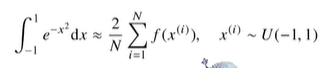